In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv DS.csv')
train.head()

,feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
0,0.001963,42,0,0.079941,1350,7,0,0,0,0,0
1,0.004538,86,0,3.000000,,2,0,0,0,,0
2,0.023044,61,0,0.419916,5000,18,0,2,0,1,0
3,0.121242,48,0,0.526589,2500,12,0,1,0,1,0
4,1.000000,49,3,0.256567,5900,3,3,1,1,2,1


In [3]:
for col in list(train.columns):
    print(col, train[col].unique())

feature1 [0.00196327 0.00453829 0.02304432 ... 0.01532844 0.00224986 0.7836985 ]
age [42 86 61 48 49 68 39 47 71 64 50 29 40 62 30 46 63 38 56 74 59 51 72 41
 65 70 87 34 43 45 52 60 79 81 35 76 37 33 58 85 75 80 66 55 57 54 36 73
 53 31 78 67 82 32 44 77 69 83 84]
feature2 [0 3 1 2 4]
feature3 [0.07994079 3.         0.41991602 ... 0.34909484 0.26096602 0.59821429]
feature4 ['1350' ' ' '5000' ... '1887' '4573' '13445']
feature5 [ 7  2 18 12  3  8  4  9  5 10  6 16 11 14 21 13 24 20 15 17 23 22 19]
feature6 [0 3 1 2]
feature7 [0 2 1 3 4]
feature8 [0 1 2]
feature9 ['0' ' ' '1' '2' '3' '4']
target [0 1]


There are missing values with ' ' instead of expected numbers. Let's look how many cells are empty.

In [4]:
train.where(train != ' ', inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73276 entries, 0 to 73275
Data columns (total 11 columns):
feature1    73276 non-null float64
age         73276 non-null int64
feature2    73276 non-null int64
feature3    73276 non-null float64
feature4    58814 non-null object
feature5    73276 non-null int64
feature6    73276 non-null int64
feature7    73276 non-null int64
feature8    73276 non-null int64
feature9    71376 non-null object
target      73276 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 6.1+ MB


//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


As we can see, columns feature4 and feature9 are not full and contain object values.
We could drop rows with empty cells, but we would loose a lot of data. Let's investigate what we can do with missings. If there are obviously prevailing values in the columns, we'll fill empties with them.

In [5]:
print(train.feature4.value_counts())
train.feature9.value_counts()

1300     3024
5000     1345
4000     1045
6000      992
3000      864
10000     737
2500      711
3500      653
25000     626
7000      607
4500      594
8000      572
10500     517
2000      512
7500      509
5500      442
6500      413
9000      372
3200      304
4166      289
4200      289
6250      284
1500      278
8333      261
3333      259
3600      254
12000     248
3750      247
12500     244
5833      239
         ... 
6646        1
6921        1
9072        1
5354        1
6357        1
9169        1
5023        1
1627        1
8861        1
6993        1
20933       1
6599        1
12121       1
3491        1
9942        1
1497        1
7836        1
3370        1
8262        1
9508        1
13945       1
11806       1
13092       1
11066       1
8348        1
15875       1
17843       1
11157       1
13180       1
7476        1
Name: feature4, Length: 9728, dtype: int64


0    42390
1    13003
2     9537
3     4606
4     1840
Name: feature9, dtype: int64

Looks like feature4 has an interval or ratio scale with integer values, so I'm going to convert them to integers and to normalize feature4 using minmax_scale (as there is no obvious prevailing value, I'll fill empty cells with the mean). 

In feature9 column I'll fill missing values with 0, which is the most common value there.

In [6]:
from sklearn.preprocessing import minmax_scale

train['feature4'] = pd.to_numeric(train['feature4'], errors = 'coerce')
train['feature4'] = minmax_scale(train['feature4'].fillna(train['feature4'].mean()).astype(int))
train['feature9'] = pd.to_numeric(train['feature9'], errors = 'coerce').fillna(0).astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73276 entries, 0 to 73275
Data columns (total 11 columns):
feature1    73276 non-null float64
age         73276 non-null int64
feature2    73276 non-null int64
feature3    73276 non-null float64
feature4    73276 non-null float64
feature5    73276 non-null int64
feature6    73276 non-null int64
feature7    73276 non-null int64
feature8    73276 non-null int64
feature9    73276 non-null int64
target      73276 non-null int64
dtypes: float64(3), int64(8)
memory usage: 6.1 MB


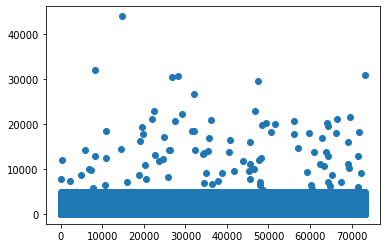

In [7]:
plt.scatter(train.index, train.feature3)

feature3 has outliers, I'll change them with the mean of the other data from this column.

(feature4 was checked before scaling, there was no visible problems with outliers. Other coluns also were checked)

In [8]:
feature3_mean, feature3_std = train.feature3.mean(), train.feature3.std()
cut_off = feature3_std * 3
lower, upper = feature3_mean - cut_off, feature3_mean + cut_off

feature3_mean_after_cleaning = train.feature3.drop(index = train.feature3[(train.feature3 > upper)].index).mean()
train.feature3[train.feature3 > upper] = feature3_mean_after_cleaning

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
def changing_age(age):
    if age < 40:
        return 0
    elif age >= 40 and age < 60:
        return 1
    else:
        return 2

# train.age = train.age.apply(changing_age)

In [10]:
# train = pd.get_dummies(train, columns = ['feature2', 'feature6', 'feature7', 'feature8', 'feature9'])

I tried treating feature2, feature6-feature9 and age columns as categorical and creating dummies for them, and GradientBoostingClassifier worked the best, but LogisticRegression gives even better result without those permutations. And it works faster :)

I'll use accuracy_score as a metric, which computes a ratio between correctly predicted and all predicted values.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

features = [col for col in train.columns if col != 'target']

kf = KFold(n_splits = 5, shuffle = True)
accuracies = []
for train_index, test_index in kf.split(train):
    X_train = train.loc[train_index, features]
    X_test = train.loc[test_index, features]
    y_train = train.loc[train_index, 'target']
    y_test = train.loc[test_index, 'target']
    lr = LogisticRegression(solver = 'newton-cg', max_iter = 200)
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    
print('Mean accuracy with 5 folds: {}'.format(sum(accuracies)/len(accuracies)))

Mean accuracy with 5 folds: 0.9377558425295627


In [12]:
from sklearn.ensemble import AdaBoostClassifier

accuracies = []
for train_index, test_index in kf.split(train):
    X_train = train.loc[train_index, features]
    X_test = train.loc[test_index, features]
    y_train = train.loc[train_index, 'target']
    y_test = train.loc[test_index, 'target']
    ada = AdaBoostClassifier()
    ada.fit(X_train, y_train)
    predictions = ada.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    
print('Mean accuracy with 5 folds: {}'.format(sum(accuracies)/len(accuracies)))

Mean accuracy with 5 folds: 0.9355450535161702


In [13]:
from sklearn.ensemble import RandomForestClassifier

accuracies = []
for train_index, test_index in kf.split(train):
    X_train = train.loc[train_index, features]
    X_test = train.loc[test_index, features]
    y_train = train.loc[train_index, 'target']
    y_test = train.loc[test_index, 'target']
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    predictions = rfc.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    
print('Mean accuracy with 5 folds: {}'.format(sum(accuracies)/len(accuracies)))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

Mean accuracy with 5 folds: 0.9326928172568791


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

accuracies = []
for train_index, test_index in kf.split(train):
    X_train = train.loc[train_index, features]
    X_test = train.loc[test_index, features]
    y_train = train.loc[train_index, 'target']
    y_test = train.loc[test_index, 'target']
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    predictions = gbc.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    
print('Mean accuracy with 5 folds: {}'.format(sum(accuracies)/len(accuracies)))

Mean accuracy with 5 folds: 0.9370598678633313


As we can see, the LogisticRegression works slightly better than other classifiers, so I'll use it to predict target values in test set. But before this I should do the same permutations with the test set as with the train set.

In [15]:
test = pd.read_csv('test.csvDS.csv')
test.head()

,feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,0.023657,36,0,0.217104,5600,9,0,1,0,0
1,0.296908,32,0,0.225554,3967,10,0,0,0,0
2,0.000000,55,0,0.140762,19230,5,1,1,0,3
3,0.189247,64,2,0.313499,6570,12,0,1,0,0
4,0.021449,29,0,0.405797,2000,9,0,0,0,0


In [16]:
for col in list(test.columns):
    print(col, test[col].unique())

feature1 [0.023657   0.29690834 0.         ... 0.04060275 0.59382739 0.95260137]
age [36 32 55 64 29 58 39 52 54 47 49 34 56 79 87 44 57 42 61 50 65 74 31 45
 38 78 60 72 63 75 37 69 51 35 62 66 68 33 77 73 59 53 48 71 41 70 67 85
 40 46 76 86 30 81 82 83 84 43 80]
feature2 [0 2 1 3 4]
feature3 [0.21710409 0.22555443 0.14076231 ... 0.80121111 0.42723389 0.29333768]
feature4 ['5600' '3967' '19230' ... '23916' '5346' '18217']
feature5 [ 9 10  5 12  2 16  7  4  3 11  6 19  8 15 13 23 24 14 21 20 17 18 22]
feature6 [0 1 2 3]
feature7 [1 0 2 3 4]
feature8 [0 1 2]
feature9 ['0' '3' '2' '1' '4' ' ']


In [17]:
test['feature4'] = pd.to_numeric(test['feature4'], errors = 'coerce')
test['feature4'] =  minmax_scale(test['feature4'].fillna(test['feature4'].mean()).astype(int))
test['feature9'] = pd.to_numeric(test['feature9'], errors = 'coerce').fillna(0).astype(int)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31405 entries, 0 to 31404
Data columns (total 10 columns):
feature1    31405 non-null float64
age         31405 non-null int64
feature2    31405 non-null int64
feature3    31405 non-null float64
feature4    31405 non-null float64
feature5    31405 non-null int64
feature6    31405 non-null int64
feature7    31405 non-null int64
feature8    31405 non-null int64
feature9    31405 non-null int64
dtypes: float64(3), int64(7)
memory usage: 2.4 MB


In [18]:
feature3_mean, feature3_std = test.feature3.mean(), test.feature3.std()
cut_off = feature3_std * 3
lower, upper = feature3_mean - cut_off, feature3_mean + cut_off

feature3_mean_after_cleaning = test.feature3.drop(index = test.feature3[(test.feature3 > upper)].index).mean()
test.feature3[test.feature3 > upper] = feature3_mean_after_cleaning

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now we're ready to get predictions

In [19]:
lr = LogisticRegression(solver = 'newton-cg', max_iter = 200)
lr.fit(train[features], train['target'])
test['target'] = lr.predict(test)

And the last step, I'm going to sort dataframes by reliability rate from the most to the least reliable person using probabilities of getting 0 value in the target column.

In [20]:
train['rating'] = lr.predict_proba(train[features])[:, 0]
train_indexes_sorted_by_rating = train['rating'].sort_values(ascending = False).index
train_sorted = train.iloc[train_indexes_sorted_by_rating, :]
train_sorted.to_csv('train_ranked.csv')

In [21]:
test['rating'] = lr.predict_proba(test[features])[:, 0]
test_indexes_sorted_by_rating = test['rating'].sort_values(ascending = False).index
test_sorted = test.iloc[test_indexes_sorted_by_rating, :]
test_sorted.to_csv('test_ranked.csv')